In [1]:
import networkx as nx
import pandas as pd
import scipy
import seaborn as sbn
import numpy as np

In [2]:
ortholog_groups = pd.read_csv('data/ortholog_groups.tsv', sep='\t')
ortholog_groups = ortholog_groups.drop('GCF_016801865.1.faa', axis=1)
ortholog_groups

,group_id,group_size,sp_in_grp,seed_ortholog_cnt,GCA_000441895.2.faa,GCF_000005575.2.faa,GCF_006496715.1.faa,GCF_013141755.1.faa,GCF_013758885.1.faa,GCF_015732765.1.faa,...,GCF_943734655.1.faa,GCF_943734665.1.faa,GCF_943734685.1.faa,GCF_943734695.1.faa,GCF_943734725.1.faa,GCF_943734745.1.faa,GCF_943734755.1.faa,GCF_943734845.2.faa,GCF_943737925.1.faa,GCF_002204515.2.faa
0,1,604,20,604,KFB45445.1,*,"XP_019534416.2,XP_019537733.2,XP_029707748.1,X...","XP_035890486.1,XP_035890546.1,XP_035890548.1,X...","XP_035774813.1,XP_035780876.1,XP_035780935.1,X...","XP_038106124.1,XP_038106215.1,XP_038106250.1,X...",...,"XP_053681622.1,XP_053681665.1,XP_053682608.1,X...",XP_050095375.1,"XP_040233459.2,XP_040240799.1,XP_049461225.1,X...","XP_050072605.1,XP_050072649.1,XP_050077807.1,X...","XP_053661558.1,XP_053661577.1,XP_053661808.1,X...","XP_049542547.1,XP_049542558.1,XP_049542559.1,X...","XP_052891389.1,XP_052891823.1,XP_052892561.1,X...","XP_049277100.1,XP_049277727.1,XP_049279403.1,X...","XP_053678616.1,XP_053678670.1",XP_021706494.1
1,2,593,21,593,KFB44859.1,XP_318577.4,"XP_019550573.2,XP_019550575.2,XP_019550615.1,X...","XP_035908586.1,XP_035908587.1,XP_035908588.1,X...","XP_035774579.1,XP_035774580.1,XP_035774581.1,X...",XP_038106739.1,...,"XP_053696339.1,XP_053696340.1,XP_053696341.1,X...","XP_050081888.1,XP_050081889.1,XP_050081890.1,X...","XP_049465177.1,XP_049465178.1,XP_049465179.1,X...","XP_050076690.1,XP_050076692.1,XP_050076693.1,X...",XP_053661628.1,"XP_049529748.1,XP_049529749.1,XP_049529750.1,X...","XP_052896605.1,XP_052896606.1,XP_052896607.1,X...","XP_049288636.1,XP_049288637.1,XP_049288638.1,X...",XP_053672424.1,"XP_021702309.1,XP_021702310.1,XP_021702311.1,X..."
2,3,583,21,583,KFB44005.1,"XP_001689103.1,XP_318122.4,XP_554647.3","XP_029720946.1,XP_029720947.1,XP_029720948.1,X...","XP_035912723.1,XP_035912724.1,XP_035912725.1,X...","XP_035791462.1,XP_035791463.1,XP_035791464.1,X...","XP_038108847.1,XP_038108848.1,XP_038108849.1,X...",...,XP_053688723.1,"XP_050094348.1,XP_050094349.1,XP_050094350.1,X...","XP_040221500.2,XP_049462194.1,XP_049462195.1,X...","XP_050073218.1,XP_050073219.1,XP_050073220.1,X...",XP_053661647.1,"XP_049543091.1,XP_049543092.1,XP_049543094.1,X...",XP_052894704.1,"XP_049294810.1,XP_049294811.1,XP_049294813.1,X...",XP_053672771.1,"XP_021708032.1,XP_021708033.1,XP_021708034.1,X..."
3,4,579,19,579,*,*,"XP_019531013.2,XP_029707759.1,XP_029708120.1,X...","XP_035890485.1,XP_035890489.1,XP_035890550.1,X...","XP_035789690.1,XP_035789695.1,XP_035792094.1","XP_038104717.1,XP_038106010.1,XP_038106182.1,X...",...,"XP_053681613.1,XP_053681638.1,XP_053685674.1,X...","XP_050087978.1,XP_050091400.1,XP_050091898.1","XP_040220550.2,XP_040225662.2,XP_040226826.2,X...","XP_050072320.1,XP_050072613.1,XP_050077223.1,X...","XP_053661557.1,XP_053661775.1,XP_053661796.1,X...","XP_049539022.1,XP_049542458.1","XP_052888152.1,XP_052888176.1,XP_052888229.1,X...","XP_049278095.1,XP_049279424.1,XP_049282141.1,X...","XP_053674046.1,XP_053674047.1,XP_053674050.1,X...","XP_021694215.1,XP_021711902.1"
4,5,572,21,572,KFB35461.1,XP_309810.4,"XP_029721280.1,XP_029721281.1,XP_029721282.1,X...","XP_035901213.1,XP_035901214.1,XP_035901215.1,X...","XP_035788141.1,XP_035788142.1,XP_035788143.1,X...","XP_038109783.1,XP_038109785.1,XP_038109786.1,X...",...,XP_053683718.1,XP_050096229.1,"XP_040238670.1,XP_040238671.1,XP_040238672.1,X...","XP_050081246.1,XP_050081247.1,XP_050081248.1,X...",XP_053659485.1,"XP_049546736.1,XP_049546737.1,XP_049546738.1,X...",XP_052901846.1,"XP_049290893.1,XP_049290894.1,XP_049290895.1,X...",XP_053670760.1,"XP_021705545.1,XP_021705546.1,XP_021705547.1,X..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15850,15851,2,2,2,*,*,*,*,*,*,...,*,*,*,*,*,*,XP_052889076.1,XP_049294092.1,*,*
15851,15852,2,2,2,*,*,*,*,*,*,...,*,*,*,*,*,*,XP_052892312.1,XP_049283855.1,*,*
15852,15853,2,2,2,*,*,*,*,*,*,...,*,*,*,*,*,*,XP_052892609.1,XP_049294257.1,*,*
15853,15854,2,2,2,*,*,*,*,*,*,...,*,*

In [3]:
next(ortholog_groups.iterrows())[1][4:]

GCA_000441895.2.faa                                           KFB45445.1
GCF_000005575.2.faa                                                    *
GCF_006496715.1.faa    XP_019534416.2,XP_019537733.2,XP_029707748.1,X...
GCF_013141755.1.faa    XP_035890486.1,XP_035890546.1,XP_035890548.1,X...
GCF_013758885.1.faa    XP_035774813.1,XP_035780876.1,XP_035780935.1,X...
GCF_015732765.1.faa    XP_038106124.1,XP_038106215.1,XP_038106250.1,X...
GCF_016801865.2.faa    XP_039428860.1,XP_039429244.1,XP_039429584.1,X...
GCF_016920715.1.faa    XP_040151009.1,XP_040151030.1,XP_040151100.1,X...
GCF_017562075.2.faa    XP_041765825.1,XP_041765874.1,XP_041765977.1,X...
GCF_943734635.1.faa    XP_052870601.1,XP_052870913.1,XP_052870965.1,X...
GCF_943734655.1.faa    XP_053681622.1,XP_053681665.1,XP_053682608.1,X...
GCF_943734665.1.faa                                       XP_050095375.1
GCF_943734685.1.faa    XP_040233459.2,XP_040240799.1,XP_049461225.1,X...
GCF_943734695.1.faa    XP_050072605.1,XP_050072649.

In [4]:
relevant_species = ortholog_groups.columns[4:]
relevant_species = {sp.strip('.faa') for sp in relevant_species}
relevant_species

{'GCA_000441895.2',
 'GCF_000005575.2',
 'GCF_002204515.2',
 'GCF_006496715.1',
 'GCF_013141755.1',
 'GCF_013758885.1',
 'GCF_015732765.1',
 'GCF_016801865.2',
 'GCF_016920715.1',
 'GCF_017562075.2',
 'GCF_943734635.1',
 'GCF_943734655.1',
 'GCF_943734665.1',
 'GCF_943734685.1',
 'GCF_943734695.1',
 'GCF_943734725.1',
 'GCF_943734745.1',
 'GCF_943734755.1',
 'GCF_943734845.2',
 'GCF_943737925.1'}

Create a directed graph with genes as nodes and edges representing a close-homolog relation (obtained from diamond). Edges are weigted with the identity percentage.

In [18]:
from os import listdir
from os.path import isfile, join
import re

path = './data/correspondences/'

files = [f for f in listdir(path) if isfile(join(path, f))]

g = nx.DiGraph()

all_species = set()
prot_to_species = {}

for file in files:
    if not file.endswith('csv'):
        continue
    print(file)
    species1, species2 = re.search(r'(.*)-(.*)\.csv', file).groups()
    if species1 not in relevant_species or species2 not in relevant_species:
        continue
    all_species.add(species1)
    all_species.add(species2)
    corresondences = pd.read_csv(join(path, file)) 
    corresondences = corresondences[corresondences['identity'] > 0]
    nodes = []
    edges = []
    for row in corresondences.iterrows():
        prot1, prot2, ident = row[1]
        prot_to_species[prot1] = species1
        prot_to_species[prot2] = species2
        nodes.append((prot1, {'species': species1}))
        nodes.append((prot2, {'species': species2}))
        edges.append((prot1, prot2, {'identity': 100-ident}))
    g.add_nodes_from(nodes)
    g.add_edges_from(edges)


GCF_029784165.1-GCF_943734705.1.csv
GCF_030247195.1-GCF_943734745.1.csv
GCF_030247195.1-GCF_943734665.1.csv
GCA_000441895.2-GCF_000005575.2.csv
GCF_943734665.1-GCF_943734745.1.csv
GCF_000005575.2-GCF_943734755.1.csv
GCF_030247195.1-GCF_943734845.2.csv
GCF_000005575.2-GCF_030247195.1.csv
GCF_943734655.1-GCF_943734685.1.csv
GCF_030247195.1-GCF_943734725.1.csv
GCF_016920715.1-GCF_943734745.1.csv
GCF_029784155.1-GCF_943734745.1.csv
GCF_006496715.1-GCF_016801865.2.csv
GCF_000005575.2-GCF_943734845.2.csv
GCF_016801865.2-GCF_943734755.1.csv
GCF_943734665.1-GCF_943734765.1.csv
GCF_015732765.1-GCF_943734755.1.csv
GCF_017562075.2-GCF_029784155.1.csv
GCF_006496715.2-GCF_029784135.1.csv
GCF_943734695.1-GCF_943735745.2.csv
GCF_016920715.1-GCF_017562075.2.csv
GCF_030247195.1-GCF_943734635.1.csv
GCF_030247195.1-GCF_943734755.1.csv
GCA_000441895.2-GCF_943737925.1.csv
GCF_943734665.1-GCF_943734685.1.csv
GCF_013758885.1-GCF_943734695.1.csv
GCF_943734635.1-GCF_943734745.1.csv
GCF_002204515.2-GCF_03024718

In [7]:

from os import listdir
from os.path import isfile, join
import re

def create_graph(relevant_species):
    path = './data/correspondences/'

    files = [f for f in listdir(path) if isfile(join(path, f))]

    g = nx.DiGraph()

    all_species = set()
    prot_to_species = {}
    
    prot_to_id = {}
    id_to_prot = {}
    id = 1

    for file in files:
        if not file.endswith('csv'):
            continue
        print(file)
        species1, species2 = re.search(r'(.*)-(.*)\.csv', file).groups()
        if species1 not in relevant_species or species2 not in relevant_species:
            continue
        all_species.add(species1)
        all_species.add(species2)
        corresondences = pd.read_csv(join(path, file)) 
        # corresondences = corresondences[corresondences['identity'] > 0]
        nodes = []
        edges = []
        for row in corresondences.iterrows():
            prot1, prot2, ident = row[1]

            if prot1 not in prot_to_id:
                prot_to_species[prot1] = species1
                prot_to_id[prot1] = id
                id_to_prot[id] = prot1
                nodes.append(id)
                id += 1
            
            if prot2 != '':
                if prot2 not in prot_to_id:
                    prot_to_species[prot2] = species2
                    prot_to_id[prot2] = id
                    id_to_prot[id] = prot2
                    nodes.append(id)
                    id += 1
                edges.append((prot_to_id[prot1], prot_to_id[prot2], {'identity': (100 - ident)/100.0}))

            # nodes.append((prot1, {'species': species1}))
            # nodes.append((prot2, {'species': species2}))
        g.add_nodes_from(nodes)
        g.add_edges_from(edges)
        
    return g, prot_to_species, id_to_prot, prot_to_id

g, _, id_to_prot, prot_to_id = create_graph(relevant_species)

GCF_029784165.1-GCF_943734705.1.csv
GCF_030247195.1-GCF_943734745.1.csv
GCF_030247195.1-GCF_943734665.1.csv
GCA_000441895.2-GCF_000005575.2.csv
GCF_943734665.1-GCF_943734745.1.csv
GCF_000005575.2-GCF_943734755.1.csv
GCF_030247195.1-GCF_943734845.2.csv
GCF_000005575.2-GCF_030247195.1.csv
GCF_943734655.1-GCF_943734685.1.csv
GCF_030247195.1-GCF_943734725.1.csv
GCF_016920715.1-GCF_943734745.1.csv
GCF_029784155.1-GCF_943734745.1.csv
GCF_006496715.1-GCF_016801865.2.csv
GCF_000005575.2-GCF_943734845.2.csv
GCF_016801865.2-GCF_943734755.1.csv
GCF_943734665.1-GCF_943734765.1.csv
GCF_015732765.1-GCF_943734755.1.csv
GCF_017562075.2-GCF_029784155.1.csv
GCF_006496715.2-GCF_029784135.1.csv
GCF_943734695.1-GCF_943735745.2.csv
GCF_016920715.1-GCF_017562075.2.csv
GCF_030247195.1-GCF_943734635.1.csv
GCF_030247195.1-GCF_943734755.1.csv
GCA_000441895.2-GCF_943737925.1.csv
GCF_943734665.1-GCF_943734685.1.csv
GCF_013758885.1-GCF_943734695.1.csv
GCF_943734635.1-GCF_943734745.1.csv
GCF_002204515.2-GCF_03024718

In [11]:
g.number_of_nodes(), g.number_of_edges()

(659239, 5082931)

In [6]:
gu = g.to_undirected()

In [10]:
from analysis import get_anthropophily_groups
import random

rel_groups = [42, 18, 3197, 1460, 1055, 480, 1905, 698, 8, 357, 155, 1823, 1233, 1653, 614, 28, 38, 1645, 1673, 111, 1623, 140, 1499, 872, 69, 2623]
ag = get_anthropophily_groups()

mods = []
for rg in rel_groups:
    t = gu.subgraph([gene for sp in ortholog_groups.iloc[rg, 4:] for gene in sp.split(',')])
    ta = [n for n in t.nodes() if prot_to_species[n] in ag['HIGH']]
    tn = [n for n in t.nodes() if prot_to_species[n] in ag['LOW']]
    # m = nx.community.modularity(t, [ta, tn], weight=None, resolution=0.1)
    m = np.mean(nx.community.partition_quality(t, [ta, tn]))
    mrs = []
    for _ in range(100):
        tx = random.sample(t.nodes(), len(ta))
        ty = [n for n in t.nodes() if n not in tx]
        # mr = nx.community.modularity(t, [tx, ty], weight=None, resolution=0.1)
        mr = np.mean(nx.community.partition_quality(t, [tx, ty]))
        mrs.append(mr)
    mods.append((m, mrs))

# sbn.distplot(mods)

/tmp/ipykernel_20352/2249173185.py:16: DeprecationWarning: Sampling from a set deprecated
since Python 3.9 and will be removed in a subsequent version.
  tx = random.sample(t.nodes(), len(ta))


In [11]:
for m, mrs in mods:
    zscore = (m - np.mean(mrs)) / np.std(mrs)
    print(zscore)


-10.11368884291134
-4.106239169294007
-0.8140168239418465
-1.9095825144578191
-3.0956020716959265
-1.0943674579152913
-1.2104938675372277
-2.8390366616789944
-11.662091842530568
-14.41610970334778
-1.1471307181949266
-2.283869822325081
-7.828022144919116
-1.9665460137243853
-2.28041645079144
-10.0882789796745
-1.9253079402377526
-0.6448550071808677
-2.4469482478904703
-4.204194141031339
-3.433843633327664
-2.8939924101407035
-3.0040814961520463
-1.4943165288783675
-12.899842990724066
-1.9361502369923071


In [117]:
nx.community.modularity(nx.Graph([(1, 2), (3, 4), (5, 6)]), ([1, 3, 4], [2, 5, 6]))

0.16666666666666663

In [7]:
nx.community.modularity(nx.Graph([(1, 3), (3, 4), (1, 4), (2, 5), (5, 6), (2, 6)]), ([1, 3, 4], [2, 5, 6]))

0.5

In [135]:
from analysis import compactness, distance

for rp in rel_groups:
    t = g.subgraph([gene for sp in ortholog_groups.iloc[rp, 4:] for gene in sp.split(',')])
    ta = [n for n in t.nodes() if prot_to_species[n] in ag['HIGH']]
    tn = [n for n in t.nodes() if prot_to_species[n] in ag['LOW']]
    # print((compactness(t.subgraph(ta)), compactness(t.subgraph(tn)), distance(t.subgraph(ta), t.subgraph(tn), t)))
    print(compactness(t.subgraph(ta)) * compactness(t.subgraph(tn)) / distance(t.subgraph(ta), t.subgraph(tn), t))

11.195880950082621
30.744583783845144
27.038222200820485
35.670095275115166
13.157676978050269
29.492199331226875
16.55528465290502
25.690961946513855
53.447139505224364
50.29300685302314
23.701219622057806
51.780828339835
44.304204406132044
28.513881876434386
16.590983598325202
7.6118820332438695
4.15135829249582
8.28741098611513
27.360261397526706
18.610891918806203
34.05682421281372
48.35767006841603
89.77260330890687
6.003212743200606
10.28981012621726
21.529525082983024


In [133]:

for rp in random.sample(range(ortholog_groups.shape[0]), 20):
    t = g.subgraph([gene for sp in ortholog_groups.iloc[rp, 4:] for gene in sp.split(',')])
    ta = [n for n in t.nodes() if prot_to_species[n] in ag['HIGH']]
    tn = [n for n in t.nodes() if prot_to_species[n] in ag['LOW']]
    # print((compactness(t.subgraph(ta)), compactness(t.subgraph(tn)), distance(t.subgraph(ta), t.subgraph(tn), t)))
    print(compactness(t.subgraph(ta)) * compactness(t.subgraph(tn)) / distance(t.subgraph(ta), t.subgraph(tn), t))

nan
39.13381351149964
29.32843837012425
nan
41.222355502521545
59.35535707174275
nan
30.67597633560368
36.776854948594085
nan
14.167130290560968
22.003073154800788
41.58584256719281
nan
16.597426881114583
18.240126042080192
nan
17.86785293550146
nan
1.8363989650816286


/home/mihail/mosquitoes/env/lib/python3.9/site-packages/numpy/lib/function_base.py:520: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/home/mihail/mosquitoes/env/lib/python3.9/site-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


/tmp/ipykernel_11106/879181119.py:16: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sbn.distplot(mods)
/home/mihail/mosquitoes/env/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/mihail/mosquitoes/env/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: ylabel='Density'>

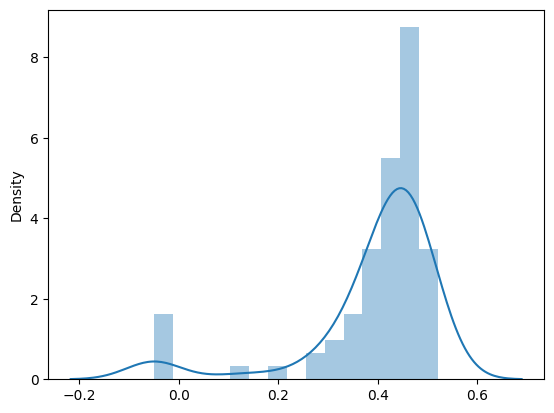

In [93]:
import random

rel_groups = random.sample(range(ortholog_groups.shape[0]), 100)
ag = get_anthropophily_groups()

mods = []
for rg in rel_groups:
    t = gu.subgraph([gene for sp in ortholog_groups.iloc[rg, 4:] for gene in sp.split(',')])
    ta = t.subgraph([n for n in t.nodes() if prot_to_species[n] in ag['HIGH']])
    tn = t.subgraph([n for n in t.nodes() if prot_to_species[n] in ag['LOW']])
    if ta.number_of_nodes() == 0 or tn.number_of_nodes() == 0:
        continue
    m = nx.community.modularity(t, [ta.nodes(), tn.nodes()], weight='identity', resolution=0.1)
    mods.append(m)

sbn.distplot(mods)

In [5]:
# ortholog_groups[ortholog_groups['sp_in_grp'] >= 21]
ortholog_groups = ortholog_groups.replace('*', None)
ortholog_groups.dropna()

,group_id,group_size,sp_in_grp,seed_ortholog_cnt,GCA_000441895.2.faa,GCF_000005575.2.faa,GCF_006496715.1.faa,GCF_013141755.1.faa,GCF_013758885.1.faa,GCF_015732765.1.faa,...,GCF_943734655.1.faa,GCF_943734665.1.faa,GCF_943734685.1.faa,GCF_943734695.1.faa,GCF_943734725.1.faa,GCF_943734745.1.faa,GCF_943734755.1.faa,GCF_943734845.2.faa,GCF_943737925.1.faa,GCF_002204515.2.faa
1,2,593,21,593,KFB44859.1,XP_318577.4,"XP_019550573.2,XP_019550575.2,XP_019550615.1,X...","XP_035908586.1,XP_035908587.1,XP_035908588.1,X...","XP_035774579.1,XP_035774580.1,XP_035774581.1,X...",XP_038106739.1,...,"XP_053696339.1,XP_053696340.1,XP_053696341.1,X...","XP_050081888.1,XP_050081889.1,XP_050081890.1,X...","XP_049465177.1,XP_049465178.1,XP_049465179.1,X...","XP_050076690.1,XP_050076692.1,XP_050076693.1,X...",XP_053661628.1,"XP_049529748.1,XP_049529749.1,XP_049529750.1,X...","XP_052896605.1,XP_052896606.1,XP_052896607.1,X...","XP_049288636.1,XP_049288637.1,XP_049288638.1,X...",XP_053672424.1,"XP_021702309.1,XP_021702310.1,XP_021702311.1,X..."
2,3,583,21,583,KFB44005.1,"XP_001689103.1,XP_318122.4,XP_554647.3","XP_029720946.1,XP_029720947.1,XP_029720948.1,X...","XP_035912723.1,XP_035912724.1,XP_035912725.1,X...","XP_035791462.1,XP_035791463.1,XP_035791464.1,X...","XP_038108847.1,XP_038108848.1,XP_038108849.1,X...",...,XP_053688723.1,"XP_050094348.1,XP_050094349.1,XP_050094350.1,X...","XP_040221500.2,XP_049462194.1,XP_049462195.1,X...","XP_050073218.1,XP_050073219.1,XP_050073220.1,X...",XP_053661647.1,"XP_049543091.1,XP_049543092.1,XP_049543094.1,X...",XP_052894704.1,"XP_049294810.1,XP_049294811.1,XP_049294813.1,X...",XP_053672771.1,"XP_021708032.1,XP_021708033.1,XP_021708034.1,X..."
4,5,572,21,572,KFB35461.1,XP_309810.4,"XP_029721280.1,XP_029721281.1,XP_029721282.1,X...","XP_035901213.1,XP_035901214.1,XP_035901215.1,X...","XP_035788141.1,XP_035788142.1,XP_035788143.1,X...","XP_038109783.1,XP_038109785.1,XP_038109786.1,X...",...,XP_053683718.1,XP_050096229.1,"XP_040238670.1,XP_040238671.1,XP_040238672.1,X...","XP_050081246.1,XP_050081247.1,XP_050081248.1,X...",XP_053659485.1,"XP_049546736.1,XP_049546737.1,XP_049546738.1,X...",XP_052901846.1,"XP_049290893.1,XP_049290894.1,XP_049290895.1,X...",XP_053670760.1,"XP_021705545.1,XP_021705546.1,XP_021705547.1,X..."
7,8,429,21,429,"KFB38258.1,KFB38259.1,KFB42458.1,KFB51644.1,KF...","XP_001237386.2,XP_001687934.1,XP_001688318.2,X...","XP_019525930.2,XP_019525992.2,XP_019527202.2,X...","XP_035890602.1,XP_035892474.1,XP_035892478.1,X...","XP_035784211.1,XP_035786836.1,XP_035787484.1,X...","XP_001842116.2,XP_001843347.2,XP_001846098.1,X...",...,"XP_053682963.1,XP_053684725.1,XP_053684728.1,X...","XP_050090739.1,XP_050091171.1,XP_050091172.1,X...","XP_040224026.1,XP_040224027.2,XP_040225203.1,X...","XP_050067593.1,XP_050075732.1,XP_050075734.1,X...","XP_053659734.1,XP_053659736.1,XP_053661877.1,X...","XP_049540065.1,XP_049540596.1,XP_049541908.1,X...","XP_052889796.1,XP_052890381.1,XP_052890384.1,X...","XP_049280210.1,XP_049284483.1,XP_049284484.1,X...","XP_053673275.1,XP_053674272.1,XP_053674274.1,X...","XP_001647954.2,XP_001647955.1,XP_001647973.1,X..."
8,9,423,21,423,"KFB35068.1,KFB35069.1,KFB35163.1,KFB35221.1,KF...","XP_001688353.2,XP_306795.2,XP_307353.3,XP_3102...","XP_029710348.1,XP_029729761.1,XP_029731244.1","XP_035890620.1,XP_035890627.1,XP_035890660.1,X...","XP_035773514.1,XP_035791100.1,XP_035792095.1,X...","XP_038106602.1,XP_038117988.1",...,"XP_053685668.1,XP_053691307.1,XP_053699460.1","XP_050091948.1,XP_050092062.1,XP_050092254.1,X...","XP_040219962.2,XP_040226220.2,XP_040228192.2,X...","XP_050070462.1,XP_050070474.1,XP_050070485.1,X...","XP_053658161.1,XP_053658189.1,XP_053660379.1,X...","XP_049531496.1,XP_049541717.1","XP_052888929.1,XP_052889146.1,XP_052890163.1,X...","XP_049277605.1,XP_049277607.1,XP_049277608.1,X...","XP_053674045.1,XP_053674051.1,XP_053678673.1","XP_001663558.2,XP_021698336.1,XP_021705627.1,X..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,.

In [8]:
def percentage_complete(graph):
    n = graph.number_of_nodes()
    e = graph.number_of_edges()
    return e / (n*(n-1))


def compactness(graph):
    # weights = []
    # for pair in itertools.permutations(graph.nodes, 2):
    #     data = graph.get_edge_data(*pair)
    #     ident = data['identity'] if data else 0
    #     weights.append(ident)
    # return np.average(weights)
    return np.average([graph.get_edge_data(*pair)['identity'] for pair in graph.edges])


def distance(subgraph1, subgraph2, graph):
    weights = []
    for n1 in subgraph1.nodes:
        for n2 in subgraph2.nodes:
            data = graph.get_edge_data(n1, n2)
            if data:
                ident = data['identity'] # if data else 0
                weights.append(ident)

            # data = graph.get_edge_data(n2, n1)
            # if data:
            #     ident = data['identity'] # if data else 0
            #     weights.append(ident)
    return np.average(weights)


In [9]:
import random
import math
from scipy.stats import shapiro
from analysis import SPECIES_ANTHROPOPHILY

# big_ortho_groups = ortholog_groups[ortholog_groups['group_size'] >= 10]
# common_ortho_groups = ortholog_groups[ortholog_groups['sp_in_grp'] >= 20]
common_ortho_groups = ortholog_groups.dropna()

shapiros = []
p_vals = []
res = []

it = 0

for _, ortho_group in common_ortho_groups.iterrows():
    it += 1
    if it % 100 == 0:
        print(it)
    genes = {gene: species.strip('.faa') for species, genes in ortho_group[4:].items() for gene in genes.split(',')}
    # genes = [gene for genes in ortho_group[1][4:] for gene in genes.split(',')]
    anthropophilic = [gene for gene, species in genes.items() if SPECIES_ANTHROPOPHILY[species] == 1]
    non_anthropophilic = [gene for gene, species in genes.items() if SPECIES_ANTHROPOPHILY[species] == -1]
    anthropophilic_subgraph = gu.subgraph(anthropophilic)
    non_anthropophilic_subgraph = gu.subgraph(non_anthropophilic)
    anthropophilic_compactness = compactness(anthropophilic_subgraph)
    non_anthropophilic_compactness = compactness(non_anthropophilic_subgraph)
    anthropophily_groups_distance = distance(anthropophilic_subgraph,
                                             non_anthropophilic_subgraph,
                                             gu)
    anthropophily_division_score = anthropophilic_compactness * non_anthropophilic_compactness / (anthropophily_groups_distance ** 2)

    random_division_scores = []
    for i in range(100):
        group1 = set(random.sample(genes.keys(), len(anthropophilic)))
        group2 = genes.keys() - group1

        group1_subgraph = gu.subgraph(group1)
        group2_subgraph = gu.subgraph(group2)

        compactness1 = compactness(group1_subgraph)
        compactness2 = compactness(group2_subgraph)
        subgraphs_distance = distance(group1_subgraph, group2_subgraph, g)
        agg_score = compactness1 * compactness2 / (subgraphs_distance ** 2)
        random_division_scores.append(agg_score)
    mean_rand_division_score = np.average(random_division_scores)
    # print(random_division_scores)

    shapiro_stat, shapiro_p = scipy.stats.shapiro(random_division_scores)
    # print(shapiro_stat, shapiro_p)
    shapiros.append(shapiro_stat)
    
    stat, p = scipy.stats.ttest_1samp(random_division_scores, anthropophily_division_score, alternative='less')
    p_vals.append((ortho_group['group_id'], stat, p))
    
    # fit a normal distribution to the random_division_scores
    # dist = scipy.stats.fit(scipy.stats.norm, random_division_scores)
    std = np.std(random_division_scores)
    # dist = scipy.stats.norm(mean_rand_division_score, np.std(random_division_scores))
    # get how many standard deviations from the mean the anthropophily_division_score is
    std_dev_dist = (anthropophily_division_score - mean_rand_division_score) / std
    res.append((mean_rand_division_score, std, anthropophily_division_score, std_dev_dist))
    
    # sbn.displot(random_division_scores)
    # print(random_division_scores)
    
    # print(scipy.stats.norm.fit(random_division_scores))

# print(np.median(shapiros))

p_vals = pd.DataFrame(p_vals, columns=('group_id', 'stat', 'p'))
res = pd.DataFrame(res, columns=('mean', 'std', 'anthropophily_division_score', 'std_dev_dist'))
# res['p'] = scipy.stats.false_discovery_control(res['p'])
res


/tmp/ipykernel_5305/1077833029.py:35: DeprecationWarning: Sampling from a set deprecated
since Python 3.9 and will be removed in a subsequent version.
  group1 = set(random.sample(genes.keys(), len(anthropophilic)))


100
200
300
400
500
600


/home/mihail/mosquitoes/env/lib/python3.9/site-packages/numpy/lib/function_base.py:520: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/home/mihail/mosquitoes/env/lib/python3.9/site-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/home/mihail/mosquitoes/env/lib/python3.9/site-packages/scipy/stats/_morestats.py:1879: UserWarning: Input data for shapiro has range zero. The results may not be accurate.
  warnings.warn("Input data for shapiro has range zero. The results "
/home/mihail/mosquitoes/env/lib/python3.9/site-packages/scipy/stats/_axis_nan_policy.py:523: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  res = hypotest_fun_out(*samples, **kwds)
/tmp/ipykernel_5305/1077833029.py:61: RuntimeWarning: invalid value encountered in scalar divide
  std_dev_di

700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
2000
2100
2200
2300
2400
2500
2600
2700
2800
2900
3000
3100
3200
3300
3400
3500
3600
3700
3800
3900
4000
4100
4200
4300
4400
4500
4600
4700
4800
4900
5000
5100
5200
5300
5400
5500
5600
5700
5800
5900
6000
6100
6200
6300


,mean,std,anthropophily_division_score,std_dev_dist
0,1.000706,0.026833,0.953237,-1.769062
1,0.999045,0.004876,1.007782,1.791761
2,1.001059,0.017488,1.023178,1.264788
3,0.995677,0.058574,1.163209,2.860186
4,1.011232,0.060602,0.987828,-0.386185
...,...,...,...,...
6388,0.997137,0.079469,0.971587,-0.321509
6389,1.001607,0.071888,0.975661,-0.360924
6390,1.003199,0.044197,0.989592,-0.307869
6391,1.000308,0.004980,0.997780,-0.507678


Check if the distributions of the scores obtained by the random division of the ortholog groups are normal.
Note that the plot shows the distribution of the p-values from the Shapiro-Wilk test for normality (null hypothesis is that the distribution is normal).

/home/mihail/mosquitoes/env/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/mihail/mosquitoes/env/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


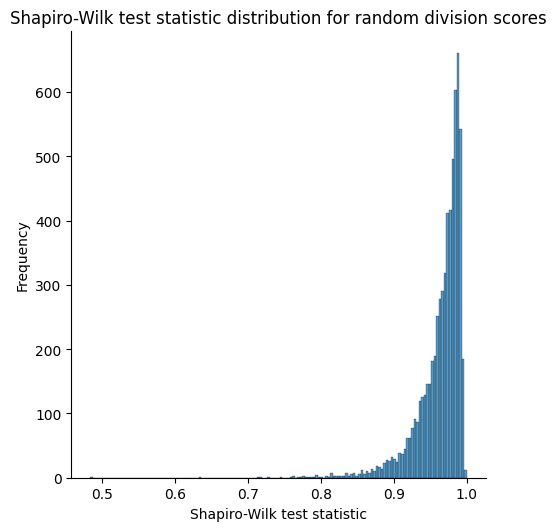

In [10]:
sbn.displot(shapiros).set(title='Shapiro-Wilk test statistic distribution for random division scores',
                          xlabel='Shapiro-Wilk test statistic',
                          ylabel='Frequency')

In [11]:
sorted_res = res.sort_values('std_dev_dist', ascending=False).dropna()
anthropophily_genes = sorted_res[sorted_res['std_dev_dist'] > 3]
anthropophily_genes

,mean,std,anthropophily_division_score,std_dev_dist
28,1.000684,0.010907,1.054658,4.948625
1412,0.988870,0.093790,1.339865,3.742344
528,1.021309,0.142622,1.531099,3.574418
794,0.979398,0.117697,1.389803,3.486951
1096,0.999542,0.006523,1.021621,3.384976
2319,0.992898,0.053186,1.166447,3.263097
1210,0.992991,0.102557,1.321336,3.201575
112,1.005650,0.045386,1.150131,3.183375
664,1.000643,0.009335,1.029884,3.132276
923,1.001086,0.021715,1.067143,3.042034


In [17]:
predicted_proteins = ortholog_groups[ortholog_groups['group_id'].isin(anthropophily_genes.index)]
predicted_proteins

,group_id,group_size,sp_in_grp,seed_ortholog_cnt,GCA_000441895.2.faa,GCF_000005575.2.faa,GCF_006496715.1.faa,GCF_013141755.1.faa,GCF_013758885.1.faa,GCF_015732765.1.faa,...,GCF_943734655.1.faa,GCF_943734665.1.faa,GCF_943734685.1.faa,GCF_943734695.1.faa,GCF_943734725.1.faa,GCF_943734745.1.faa,GCF_943734755.1.faa,GCF_943734845.2.faa,GCF_943737925.1.faa,GCF_002204515.2.faa
10,11,402,21,402,KFB49247.1,XP_319309.3,"XP_019530282.2,XP_019562584.2,XP_029708522.1,X...","XP_035909574.1,XP_035909576.1,XP_035909577.1,X...","XP_035775720.1,XP_035775721.1,XP_035775722.1,X...","XP_038110357.1,XP_038110358.1,XP_038110359.1,X...",...,"XP_053696471.1,XP_053696472.1,XP_053696473.1,X...","XP_050101311.1,XP_050101312.1,XP_050101313.1,X...","XP_040234053.1,XP_040234054.1,XP_040234055.1,X...","XP_050076429.1,XP_050076430.1,XP_050076431.1,X...",XP_053666449.1,"XP_049529657.1,XP_049529658.1,XP_049529659.1,X...","XP_052893947.1,XP_052893948.1,XP_052893949.1,X...","XP_049280835.1,XP_049280837.1,XP_049280838.1,X...","XP_053677556.1,XP_053677557.1,XP_053677558.1","XP_021701099.1,XP_021702575.1,XP_021702576.1,X..."
27,28,265,21,265,KFB41393.1,"XP_003435829.1,XP_003435830.1,XP_321696.3",XP_019548989.2,"XP_035899422.1,XP_035899423.1,XP_035899424.1,X...","XP_035779179.1,XP_035779180.1,XP_035779181.1,X...","XP_038121534.1,XP_038121536.1,XP_038121537.1,X...",...,XP_053696145.1,"XP_050086008.1,XP_050086009.1,XP_050086010.1,X...","XP_040221207.1,XP_040240667.1,XP_040240668.1,X...","XP_050069801.1,XP_050069802.1,XP_050069803.1,X...","XP_053660866.1,XP_053660867.1,XP_053660868.1,X...","XP_049535414.1,XP_049535416.1,XP_049535417.1,X...","XP_052888269.1,XP_052888270.1,XP_052888271.1,X...","XP_049278498.1,XP_049278499.1,XP_049278500.1,X...","XP_053671580.1,XP_053671581.1,XP_053671582.1","XP_001662897.2,XP_021704264.1,XP_021704265.1,X..."
111,112,167,20,167,KFB45610.1,XP_317088.3,"XP_029708903.1,XP_029708911.1,XP_029708912.1,X...","XP_035917627.1,XP_035917628.1,XP_035917629.1,X...","XP_035781234.1,XP_035781235.1,XP_035781236.1,X...","XP_038106489.1,XP_038106490.1,XP_038106491.1,X...",...,"XP_053692789.1,XP_053692790.1,XP_053692791.1,X...","XP_050081676.1,XP_050081677.1,XP_050081678.1,X...",None,XP_050076546.1,XP_053666614.1,"XP_049537261.1,XP_049537262.1,XP_049537263.1,X...","XP_052898512.1,XP_052898513.1,XP_052898514.1,X...","XP_049282251.1,XP_049282252.1,XP_049282254.1,X...",XP_053673860.1,"XP_021702192.1,XP_021702193.1,XP_021702194.1,X..."
361,362,111,21,111,KFB49615.1,XP_317515.4,"XP_019559479.2,XP_019559480.2,XP_029714204.1,X...","XP_035916197.1,XP_035916198.1,XP_035916199.1","XP_035774177.1,XP_035774179.1,XP_035774180.1,X...","XP_001843039.1,XP_038109104.1,XP_038109105.1,X...",...,"XP_053697805.1,XP_053697806.1,XP_053697807.1","XP_050083191.1,XP_050083192.1,XP_050083194.1","XP_040236841.2,XP_040236842.2,XP_040236843.2,X...",XP_050077423.1,XP_053662318.1,"XP_049549000.1,XP_049549001.1,XP_049549002.1,X...","XP_052892232.1,XP_052892233.1","XP_049287961.1,XP_049287963.1,XP_049287964.1,X...",XP_053672183.1,"XP_001653456.2,XP_021700266.1,XP_021700267.1,X..."
527,528,96,21,96,KFB43966.1,XP_318175.4,"XP_019931340.2,XP_019933369.1,XP_019933371.1,X...","XP_035907391.1,XP_035907392.1,XP_035907393.1,X...","XP_035793370.1,XP_035793372.1,XP_035793373.1,X...",XP_038107997.1,...,XP_053684257.1,"XP_050092736.1,XP_050092737.1,XP_050092738.1,X...","XP_040219793.1,XP_040219794.1,XP_040219795.1,X...","XP_050074133.1,XP_050074134.1,XP_050074135.1,X...",XP_053663499.1,"XP_049543372.1,XP_049543373.1,XP_049543374.1,X...","XP_052894012.1,XP_052894013.1,XP_052894014.1,X...","XP_049295145.1,XP_049295146.1,XP_049295147.1,X...",XP_053677522.1,"XP_021709612.1,XP_021709613.1,XP_021709614.1,X..."
663,664,88,19,88,None,None,"XP_029715708.1,XP_029724475.1,XP_029724518.1,X...","XP_035892841.1,XP_035892843.1,XP_035892844.1,X...","XP_035791927.1,XP_035791928.1,XP_035791929.1","XP_038109324.1,XP_038109325.1,XP_038109326.1,X...",...,"XP_053688641.1,XP_053688642.1,XP_053688643.1,X...","XP_050095284.1,XP

In [14]:
aedes_genes = pd.read_csv('data/tableS3.txt', sep='\t')
aedes_genes

,chr,start,end,gene,outlierSNPs,pvalues,outlierRegion
0,1,14291304,14881186,ID=AAEL021365;biotype=protein_coding;version=2,14322574;14322804;14398761,8.18106270604807e-11;2.56978768159925e-09;1.53...,0
1,1,15026962,15108330,ID=AAEL011287;biotype=protein_coding;descripti...,15063777,8.46858337982644e-09,0
2,1,15876509,15969265,ID=AAEL004180;biotype=protein_coding;version=2,15942876;15944125;15945140,3.1588841921745e-10;1.03508194963352e-09;8.926...,0
3,1,15893748,15945374,ID=AAEL004179;biotype=protein_coding;version=2,15942876;15944125;15945140,3.1588841921745e-10;1.03508194963352e-09;8.926...,0
4,1,16014383,16443984,ID=AAEL011359;biotype=protein_coding;descripti...,16063734;16067536;16119045;16131794;16236443;1...,7.72571672574266e-10;2.77132269303659e-11;3.36...,0
...,...,...,...,...,...,...,...
1744,3,395144532,395145604,ID=AAEL000677;biotype=protein_coding;descripti...,395144722,5.0874538249049e-09,0
1745,3,395239026,395241176,ID=AAEL000647;biotype=protein_coding;version=2,395240481;395240546,1.64269942574472e-09;3.68120698629884e-10,0
1746,3,395288097,395302686,ID=AAEL000634;biotype=protein_coding;descripti...,395299567;395300016;395301148,6.39736898653041e-11;3.16674428621467e-15;3.49...,0
1747,3,405923547,406255713,ID=AAEL019951;biotype=protein_coding;version=1,405928974;405980365,3.30236913220076e-09;7.73798271956067e-09,0


In [32]:
aedes_gene_ids = aedes_genes['gene'].str.split(';').apply(lambda x: x[0].strip('ID='))

aedes_id = 'GCF_002204515.2.faa'
significant_aedes_genes = set(predicted_proteins[aedes_id].apply(lambda x: x.split(',')).sum())
print(len(significant_aedes_genes))
significant_aedes_genes

76


{'XP_001652883.2',
 'XP_001652884.2',
 'XP_001653456.2',
 'XP_001660900.1',
 'XP_001662897.2',
 'XP_011493653.2',
 'XP_021696446.1',
 'XP_021698489.1',
 'XP_021700266.1',
 'XP_021700267.1',
 'XP_021700268.1',
 'XP_021700270.1',
 'XP_021701099.1',
 'XP_021701417.1',
 'XP_021701418.1',
 'XP_021702192.1',
 'XP_021702193.1',
 'XP_021702194.1',
 'XP_021702195.1',
 'XP_021702196.1',
 'XP_021702197.1',
 'XP_021702198.1',
 'XP_021702199.1',
 'XP_021702200.1',
 'XP_021702201.1',
 'XP_021702203.1',
 'XP_021702204.1',
 'XP_021702575.1',
 'XP_021702576.1',
 'XP_021703765.1',
 'XP_021703766.1',
 'XP_021703767.1',
 'XP_021703768.1',
 'XP_021703769.1',
 'XP_021704264.1',
 'XP_021704265.1',
 'XP_021704266.1',
 'XP_021704267.1',
 'XP_021704268.1',
 'XP_021704269.1',
 'XP_021704270.1',
 'XP_021704271.1',
 'XP_021704272.1',
 'XP_021704273.1',
 'XP_021704274.1',
 'XP_021704275.1',
 'XP_021704277.1',
 'XP_021704278.1',
 'XP_021704279.1',
 'XP_021705116.1',
 'XP_021705117.1',
 'XP_021705118.1',
 'XP_0217051

In [27]:
from ncbi.datasets.openapi.model.v1_gene_dataset_request import V1GeneDatasetRequest
from ncbi.datasets.openapi.api.gene_api import GeneApi

gene_api = GeneApi()

gene_dataset_request = V1GeneDatasetRequest(accessions=list(significant_aedes_genes))
response = gene_api.gene_metadata_by_post(gene_dataset_request)
response


{'genes': [{'gene': {'annotations': [{'assemblies_in_scope': [{'accession': 'GCF_002204515.2',
                                                               'name': 'AaegL5.0'}],
                                      'release_date': '2017-07-12',
                                      'release_name': 'NCBI Aedes aegypti '
                                                      'Annotation Release '
                                                      '101'}],
                     'chromosomes': ['1'],
                     'common_name': 'yellow fever mosquito',
                     'description': 'myosin heavy chain, muscle-like',
                     'gene_id': '110678344',
                     'genomic_ranges': [{'accession_version': 'NC_035107.1',
                                         'range': [{'begin': '151955864',
                                                    'end': '152241832',
                                                    'orientation': 'plus'}]}],
               

In [28]:
# extract synonyms starting with AAEL

aedes_significant_genes = []

for gene in response['genes']:
    if 'synonyms' not in gene['gene']:
        continue
    synonyms = gene['gene']['synonyms']
    # get synonyms starting with AAEL
    aedes_synonyms = [synonym for synonym in synonyms if synonym.startswith('AAEL')]
    if len(aedes_synonyms) == 0:
        continue
    synonym = aedes_synonyms[0]
    aedes_significant_genes.append(synonym)
    
aedes_significant_genes


['AAEL017374',
 'AAEL005656',
 'AAEL001254',
 'AAEL001406',
 'AAEL008607',
 'AAEL008853',
 'AAEL010543',
 'AAEL013094',
 'AAEL002628',
 'AAEL012246',
 'AAEL000504',
 'AAEL002991']

In [31]:
set(aedes_significant_genes) & set(aedes_gene_ids)

{'AAEL000504', 'AAEL001254', 'AAEL005656', 'AAEL010543'}

In [38]:
aedes_gene_ids # .to_csv('data/aedes_genes_from_paper.csv', index=False)

0       AAEL021365
1       AAEL011287
2       AAEL004180
3       AAEL004179
4       AAEL011359
           ...    
1744    AAEL000677
1745    AAEL000647
1746    AAEL000634
1747    AAEL019951
1748    AAEL001113
Name: gene, Length: 1749, dtype: object

In [49]:
paper_genes_as_prot_ids = pd.read_csv('data/paper_genes_as_prot_ids.csv', header=None, names=['protein']) #['gene'].apply(lambda x: x.split('.')[0])
paper_genes_as_prot_ids

,protein
0,XP_021696968.1
1,XP_021696979.1
2,XP_021696978.1
3,XP_021696977.1
4,XP_021696976.1
...,...
2797,XP_021701535.1
2798,XP_021701529.1
2799,XP_021701528.1
2800,XP_021701527.1


In [56]:
set(significant_aedes_genes) & set(paper_genes_as_prot_ids['protein'])

{'XP_001652883.2',
 'XP_001652884.2',
 'XP_001660900.1',
 'XP_021698489.1',
 'XP_021701417.1',
 'XP_021701418.1',
 'XP_021702575.1',
 'XP_021702576.1',
 'XP_021705116.1',
 'XP_021705117.1',
 'XP_021705118.1',
 'XP_021705119.1',
 'XP_021705120.1'}

In [67]:
import os
for s in relevant_species:
    if not os.path.isfile(f'./data/sequences/{s}.faa'):
        print(s)

In [70]:
for i, row in dd.from_pandas(ortholog_groups, npartitions=4).iterrows():
    


,group_id,group_size,sp_in_grp,seed_ortholog_cnt,GCA_000441895.2.faa,GCF_000005575.2.faa,GCF_006496715.1.faa,GCF_013141755.1.faa,GCF_013758885.1.faa,GCF_015732765.1.faa,GCF_016801865.2.faa,GCF_016920715.1.faa,GCF_017562075.2.faa,GCF_943734635.1.faa,GCF_943734655.1.faa,GCF_943734665.1.faa,GCF_943734685.1.faa,GCF_943734695.1.faa,GCF_943734725.1.faa,GCF_943734745.1.faa,GCF_943734755.1.faa,GCF_943734845.2.faa,GCF_943737925.1.faa,GCF_002204515.2.faa
npartitions=4,,,,,,,,,,,,,,,,,,,,,,,,
0,int64,int64,int64,int64,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object
3964,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7928,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11892,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15854,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...


: 